### Modeling for insurance Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

from sklearn.metrics import f1_score, auc, precision_score, recall_score, make_scorer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
inpatient_data = pd.read_pickle('../../data/feature engineered/inpatient.pkl')
outpatient_data = pd.read_pickle('../../data/feature engineered/outpatient.pkl')

In [4]:
inpatient_data.shape, outpatient_data.shape

((40474, 49), (517737, 47))

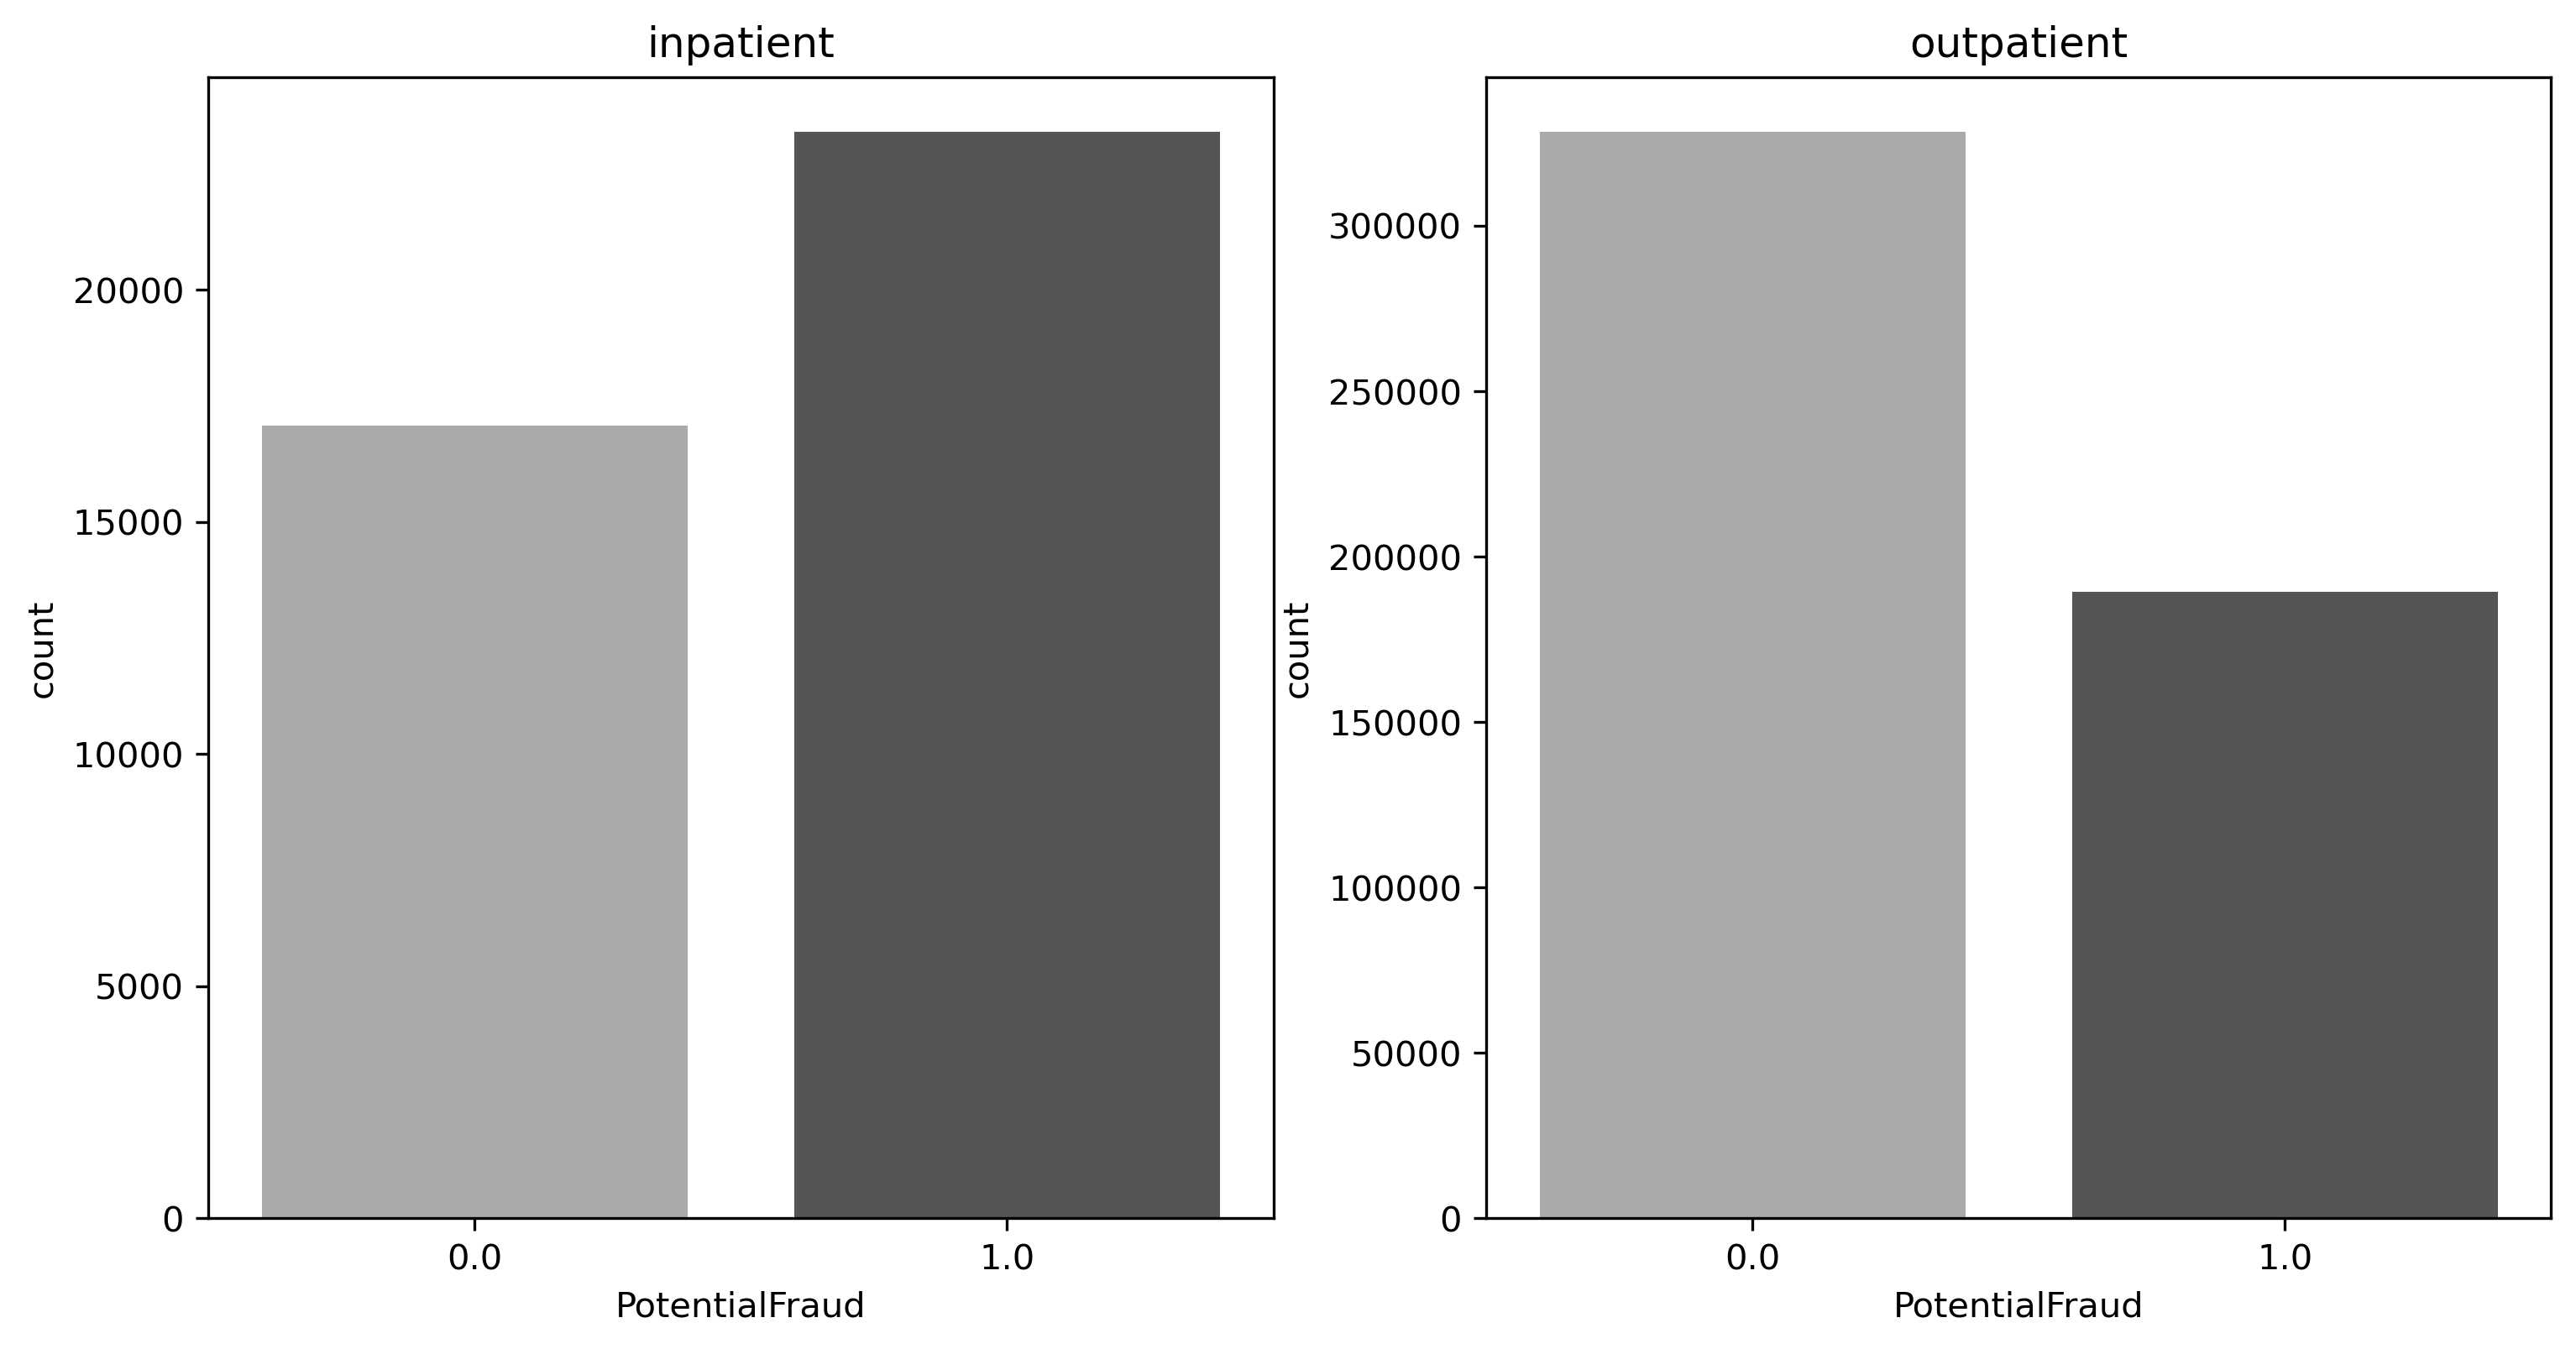

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12, 6], dpi=300)
sns.countplot(x=inpatient_data['PotentialFraud'], ax=axes[0], palette='binary')
axes[0].set_title('inpatient')
sns.countplot(x=outpatient_data['PotentialFraud'], ax=axes[1], palette='binary')
axes[1].set_title('outpatient')
plt.show()

****Inpatient****

In [6]:
train, test = train_test_split(inpatient_data, test_size=0.2)
train.shape, test.shape

((32379, 49), (8095, 49))

In [7]:
Y = train['PotentialFraud']
X = train.drop('PotentialFraud', axis=1)

In [13]:
cv = RepeatedKFold(n_splits=4, n_repeats=8, random_state=1)

### model one

In [9]:
feature_pipeline = Pipeline(steps=[('feat_selection', SelectKBest(score_func=mutual_info_classif, k=10))])
model_1 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', LogisticRegression(max_iter=1000, penalty='l2', solver='saga'))])
model_1.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))])),
  ('model', LogisticRegression(max_iter=1000, solver='saga'))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))]),
 'model': LogisticRegression(max_iter=1000, solver='saga'),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__C

In [13]:
grid = {'model__class_weight': [{0: 1, 1: w} for w in np.linspace(1, 10, 20)]}

model_1_gs = GridSearchCV(estimator=model_1, cv=cv, n_jobs=-1,
                          param_grid=grid,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True,
                          )
model_1_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=12, n_splits=6, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x000001D642189E18>))])),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [{0: 1, 1: 1.0},
                                                 {0: 1, 1: 1.473...
                                                 {0: 1, 1: 6.2105263157894735},
                                                 {0: 1, 1: 6.684210526315789},
                                                 {0: 1, 1: 7.157894736842105},
                                                 {0: 1, 1: 7.631

In [18]:
model_1_cv = pd.DataFrame(model_1_gs.cv_results_)
model_1_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split64_train_f1,split65_train_f1,split66_train_f1,split67_train_f1,split68_train_f1,split69_train_f1,split70_train_f1,split71_train_f1,mean_train_f1,std_train_f1
0,18.197283,1.716909,0.023824,0.008864,"{0: 1, 1: 1.0}","{'model__class_weight': {0: 1, 1: 1.0}}",0.815208,0.817633,0.819680,0.811547,...,0.678956,0.676325,0.678471,0.678041,0.681243,0.680000,0.677138,0.679449,0.678933,0.001713
1,19.085700,0.408710,0.023531,0.008236,"{0: 1, 1: 1.4736842105263157}","{'model__class_weight': {0: 1, 1: 1.4736842105...",0.653923,0.651576,0.647482,0.644089,...,0.735558,0.735102,0.732658,0.732594,0.736233,0.734648,0.734576,0.733945,0.734228,0.001733
2,20.439193,1.063631,0.024027,0.008745,"{0: 1, 1: 1.9473684210526314}","{'model__class_weight': {0: 1, 1: 1.9473684210...",0.582816,0.576134,0.575278,0.573180,...,0.734166,0.733576,0.731809,0.734426,0.734241,0.731146,0.732028,0.731004,0.732528,0.001030
3,18.951122,0.340350,0.025281,0.011367,"{0: 1, 1: 2.4210526315789473}","{'model__class_weight': {0: 1, 1: 2.4210526315...",0.581244,0.571216,0.573850,0.570340,...,0.733889,0.733015,0.731653,0.733669,0.734146,0.731214,0.731677,0.731100,0.732250,0.001014
4,19.289672,0.591806,0.021408,0.007920,"{0: 1, 1: 2.894736842105263}","{'model__class_weight': {0: 1, 1: 2.8947368421...",0.581542,0.571058,0.573202,0.570052,...,0.734321,0.733341,0.732198,0.734178,0.734492,0.731376,0.731998,0.731286,0.732603,0.001018
5,18.986841,0.270130,0.023485,0.011245,"{0: 1, 1: 3.3684210526315788}","{'model__class_weight': {0: 1, 1: 3.3684210526...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
6,19.068139,0.448697,0.024729,0.008978,"{0: 1, 1: 3.8421052631578947}","{'model__class_weight': {0: 1, 1: 3.8421052631...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
7,19.315148,1.680803,0.023155,0.008008,"{0: 1, 1: 4.315789473684211}","{'model__class_weight': {0: 1, 1: 4.3157894736...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
8,19.656072,2.926613,0.022469,0.008919,"{0: 1, 1: 4.789473684210526}","{'model__class_weight': {0: 1, 1: 4.7894736842...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
9,19.719491,3.001547,0.023030,0.008496,"{0: 1, 1: 5.263157894736842}","{'model__class_weight': {0: 1, 1: 5.2631578947...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019


In [23]:
model_1_cv.to_pickle('../../data/temp/model_1.pkl')

In [20]:
model_1_gs.best_score_, model_1_gs.best_estimator_

(0.7337678151144008,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x000001D642189E18>))])),
                 ('model',
                  LogisticRegression(class_weight={0: 1, 1: 1.4736842105263157},
                                     max_iter=1000, solver='saga'))]))

### model two

In [10]:
model_2 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', SGDClassifier(max_iter=500))])
model_2.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))])),
  ('model', SGDClassifier(max_iter=500))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))]),
 'model': SGDClassifier(max_iter=500),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__alpha': 0.0001,
 'model__average': False,
 

In [12]:
grid_2 = {'model__alpha': np.random.normal(0.1, 0.001, 10),
          'model__loss': ['log', 'perceptron'],
          }

model_2_gs = GridSearchCV(estimator=model_2, cv=cv, n_jobs=-1,
                          param_grid=grid_2,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_2_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=12, n_splits=6, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x000001D642189E18>))])),
                                       ('model', SGDClassifier(max_iter=500))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.10078776, 0.10100277, 0.10109669, 0.09869501, 0.09895422,
       0.10077676, 0.10033186, 0.10140792, 0.09984408, 0.10158961]),
                         'model__loss': ['log', 'perceptron']},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [19]:
model_2_cv = pd.DataFrame(model_2_gs.cv_results_)
model_2_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__loss,params,split0_test_precision,split1_test_precision,split2_test_precision,...,split64_train_f1,split65_train_f1,split66_train_f1,split67_train_f1,split68_train_f1,split69_train_f1,split70_train_f1,split71_train_f1,mean_train_f1,std_train_f1
0,18.719663,2.080121,0.026666,0.008873,0.100788,log,"{'model__alpha': 0.10078776032209992, 'model__...",0.821980,0.819457,0.835467,...,0.677710,0.677763,0.673593,0.678585,0.679930,0.674683,0.674682,0.675360,0.677486,0.003595
1,18.033697,0.967608,0.027071,0.008991,0.100788,perceptron,"{'model__alpha': 0.10078776032209992, 'model__...",0.585064,0.803262,0.583075,...,0.640904,0.645554,0.537324,0.555183,0.640282,0.664148,0.669573,0.655708,0.648611,0.074358
2,17.529849,1.170974,0.021830,0.007042,0.101003,log,"{'model__alpha': 0.10100276867475937, 'model__...",0.823931,0.831640,0.834045,...,0.676531,0.673579,0.674539,0.679075,0.679795,0.676922,0.674416,0.676009,0.676788,0.002907
3,17.706568,0.656673,0.021997,0.007522,0.101003,perceptron,"{'model__alpha': 0.10100276867475937, 'model__...",0.669412,0.703366,0.673749,...,0.629650,0.636374,0.671380,0.602026,0.669766,0.641261,0.651689,0.676430,0.649775,0.062543
4,17.794582,0.845088,0.024367,0.008124,0.101097,log,"{'model__alpha': 0.1010966907420188, 'model__l...",0.823288,0.809783,0.832626,...,0.677068,0.673748,0.674740,0.677984,0.699257,0.674969,0.676392,0.675876,0.676912,0.003800
5,17.890034,0.694473,0.024430,0.008645,0.101097,perceptron,"{'model__alpha': 0.1010966907420188, 'model__l...",0.588932,0.833741,0.717441,...,0.683735,0.642192,0.690895,0.709004,0.665049,0.675618,0.550931,0.680482,0.651431,0.074536
6,17.740429,1.010437,0.023012,0.006688,0.098695,log,"{'model__alpha': 0.09869501111897981, 'model__...",0.816883,0.821662,0.837530,...,0.676973,0.673593,0.675780,0.683749,0.675549,0.676142,0.675138,0.677535,0.677193,0.003807
7,17.683271,0.947665,0.025378,0.008695,0.098695,perceptron,"{'model__alpha': 0.09869501111897981, 'model__...",0.651163,0.680142,0.755792,...,0.685808,0.707638,0.653399,0.630664,0.477083,0.705717,0.677483,0.690867,0.663282,0.054463
8,17.743317,0.635911,0.023332,0.007241,0.098954,log,"{'model__alpha': 0.09895421582807579, 'model__...",0.824497,0.822212,0.833019,...,0.678657,0.674131,0.674665,0.680857,0.684837,0.674939,0.675240,0.675814,0.676959,0.002495
9,17.768272,0.692838,0.022719,0.007172,0.098954,perceptron,"{'model__alpha': 0.09895421582807579, 'model__...",0.679875,0.657436,0.617546,...,0.685245,0.622308,0.635047,0.688439,0.629430,0.656572,0.699983,0.682769,0.649962,0.062151


In [22]:
model_2_cv.to_pickle('../../data/temp/model_2.pkl')

In [21]:
model_2_gs.best_score_, model_2_gs.best_estimator_

(0.6768024530241585,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x000001D642189E18>))])),
                 ('model',
                  SGDClassifier(alpha=0.10078776032209992, loss='log',
                                max_iter=500))]))

### model three

In [11]:
model_3 = Pipeline(steps=[('selection', feature_pipeline),
                          ('poly', PolynomialFeatures()),
                          ('model', LogisticRegression(max_iter=1000, penalty='l2', solver='saga'))])
model_3.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))])),
  ('poly', PolynomialFeatures()),
  ('model', LogisticRegression(max_iter=1000, solver='saga'))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))]),
 'poly': PolynomialFeatures(),
 'model': LogisticRegression(max_iter=1000, solver='saga'),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features=

In [ ]:
grid_3 = {'poly__degree': [2, 3, 4, 5],
          'model__class_weight': [{0: 1, 1: w} for w in np.linspace(1, 5, 10)]}

model_3_gs = GridSearchCV(estimator=model_3, cv=cv, n_jobs=-1,
                          param_grid=grid_3,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_3_gs.fit(X, Y)

In [ ]:
model_3_gs_cv = pd.DataFrame(model_3_gs.cv_results_)
model_3_gs_cv

In [ ]:
model_3_gs_cv.to_pickle('../../data/temp/model_3.pkl')

In [ ]:
model_3_gs.best_score_, model_3_gs.best_estimator_

### model four

In [12]:
model_4 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', SVC())])
model_4.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))])),
  ('model', SVC())],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))]),
 'model': SVC(),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight'

In [ ]:
grid_4 = {'model__C': np.linspace(1, 10, 12),
          'model__class_weight': [{0: 1, 1: w} for w in np.linspace(1, 5, 10)],
          'model__degree': [3, 4, 5]}

model_4_gs = GridSearchCV(estimator=model_4, cv=cv, n_jobs=-1,
                          param_grid=grid_4,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_4_gs.fit(X, Y)

In [ ]:
model_4_gs_cv = pd.DataFrame(model_4_gs.cv_results_)
model_4_gs_cv

In [ ]:
model_4_gs_cv.to_pickle('../../data/temp/model_4.pkl')

In [ ]:
model_4_gs.best_score_, model_4_gs.best_estimator_

### model five

In [14]:
model_5 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', KNeighborsClassifier())])
model_5.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))])),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))]),
 'model': KNeighborsClassifier(),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model_

In [ ]:
grid_5 = {'model__n_neighbors': list(range(5, 13)),
          'model__leaf_size': [30, 35, 40, 45, 50, 55, 60]}

model_5_gs = GridSearchCV(estimator=grid_5, cv=cv, n_jobs=-1,
                          param_grid=grid_5,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True)
model_5_gs.fit(X, Y)

In [ ]:
model_5_gs_cv = pd.DataFrame(model_5_gs.cv_results_)
model_5_gs_cv

In [ ]:
model_5_gs_cv.to_pickle('../../data/temp/model_5.pkl')

In [ ]:
model_5_gs.best_score_, model_5_gs.best_estimator_

### model six

In [15]:
model_6 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', RadiusNeighborsClassifier())])
model_6.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))])),
  ('model', RadiusNeighborsClassifier())],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))]),
 'model': RadiusNeighborsClassifier(),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000016511389D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__algorithm': 'auto',
 'model__leaf_size': 30

In [ ]:
grid_6 = {'model__leaf_size': [30, 35, 40, 45, 50, 55, 60],
          'model__radius': np.linspace(1, 10, 12)
          }

model_6_gs = GridSearchCV(estimator=model_6, cv=cv, n_jobs=-1,
                          param_grid=grid_6,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_6_gs.fit(X, Y)

In [ ]:
model_6_gs_cv = pd.DataFrame(model_6_gs.cv_results_)
model_6_gs_cv

In [ ]:
model_6_gs_cv.to_pickle('../../data/temp/model_6.pkl')

In [ ]:
model_6_gs.best_score_, model_6_gs.best_estimator_